In [1]:

from dataset import EarthquakeDataset

dataset = EarthquakeDataset(root='./data', splits=['fold-1.txt'])
sample, label = dataset[0]
print("Returned keys:", sample.keys())
print("Optical with Shadow shape:", sample['opt_with_shadow'].shape)


Returned keys: dict_keys(['sar', 'sarftp', 'opt', 'opt_with_shadow', 'optftp'])
Optical with Shadow shape: (4, 224, 224)


In [ ]:
from dataset import EarthquakeDataset 

dataset = EarthquakeDataset(root='./data', splits=['fold-2.txt','fold-3.txt','fold-4.txt','fold-5.txt'])
print("Total samples in dataset:", len(dataset))

# Check the first sample
sample, label = dataset[0]
print("Keys in sample:", sample.keys())
print("Shape of SAR image:", sample['sar'].shape)

In [ ]:
import torch
from dataset import MyAug
# Create dummy data (simulate one sample)
dummy_sar = torch.randn(1, 3, 224, 224)
dummy_sarftp = torch.randn(1, 3, 224, 224)
dummy_opt = torch.randn(1, 3, 224, 224)
dummy_optftp = torch.randn(1, 3, 224, 224)

augmenter = MyAug()
aug_sar, aug_sarftp, aug_opt, aug_optftp = augmenter(dummy_sar, dummy_sarftp, dummy_opt, dummy_optftp)
print("Augmented SAR shape:", aug_sar.shape)


Augmented SAR shape: torch.Size([1, 3, 224, 224])


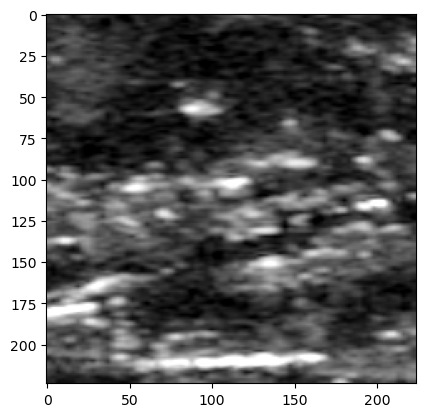

In [3]:
import matplotlib.pyplot as plt

# sample['sar'] is a NumPy array of shape (3,224,224).
# We can visualize one channel or convert it to grayscale.
sar_img = sample['sar'][0]  # take channel 0
plt.imshow(sar_img, cmap='gray')
plt.show()


Label: 0.0
SAR shape: (3, 224, 224)
Optical shape: (3, 224, 224)
Optical with Shadow shape: (4, 224, 224)


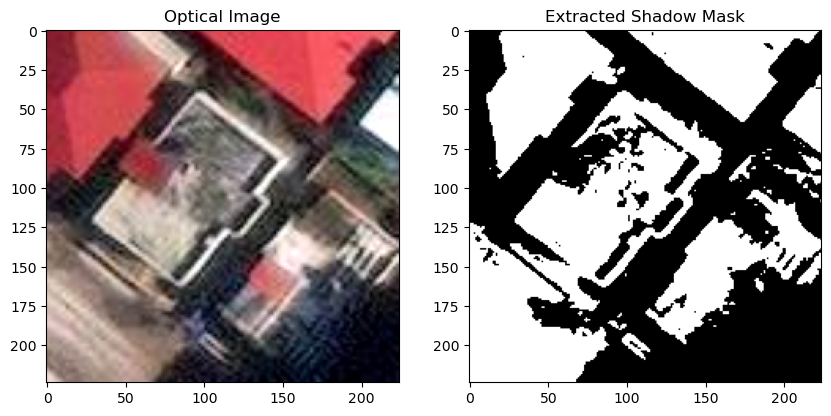

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import EarthquakeDataset  

# Create an instance of your dataset (use a single fold for testing)
dataset = EarthquakeDataset(root='./data', splits=['fold-1.txt'])

# Get a sample from the dataset
sample, label = dataset[0]
print("Label:", label)
print("SAR shape:", sample['sar'].shape)
print("Optical shape:", sample['opt'].shape)
print("Optical with Shadow shape:", sample['opt_with_shadow'].shape)

# Visualize the optical image and shadow mask
opt_img = sample['opt']
shadow_mask = sample['opt_with_shadow'][3]  # assuming the last channel is the shadow mask

# Convert optical image from (3, H, W) to (H, W, 3) for plotting
opt_img_disp = np.transpose(opt_img, (1, 2, 0))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(opt_img_disp)
plt.title("Optical Image")
plt.subplot(1, 2, 2)
plt.imshow(shadow_mask, cmap='gray')
plt.title("Extracted Shadow Mask")
plt.show()
